In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
#Red txt data file 
with open("WhatsApp Chat with #AskPyFesh_2.txt", "r", encoding = "utf-8") as file:
    chats = file.readlines()
print(len(chats))

2919


In [3]:
#Remove new lines
chats = [line.strip() for line in chats]
chats[:10]
print(len(chats))

#Clean out the join notification lines
apfesh = [line for line in chats if not "joined using this" in line]

#Further cleaning
#Remove empty lines
apfesh = [line for line in apfesh if len(line) > 1]
print(len(apfesh))

2919
2313


In [4]:
#Remove more auto lines
apfesh = [line for line in apfesh if not "You changed" in line]
print(len(apfesh))

2308


In [5]:
#Remove even more auto lines
apfesh = [line for line in apfesh if not "You revoked" in line]
print(len(apfesh))

2305


In [6]:
#Drop 'left-ers'
left = [line for line in apfesh if line.endswith("left")]
left

['10/23/19, 8:42 AM - +263 77 221 3302 left',
 '11/2/19, 3:52 PM - +234 703 553 4253 left',
 '11/4/19, 9:48 AM - +44 7436 909012 left',
 '11/13/19, 8:25 AM - +234 706 130 1525 left',
 '11/27/19, 8:53 PM - +234 703 059 4261 left',
 '11/30/19, 10:14 PM - +234 903 915 7667 left']

In [7]:
#Remove all that 'left'
apfesh = [line for line in apfesh if not line.endswith("left")]
print(len(apfesh))

2299


In [8]:
#Merge messages that belong together
msgs = [] #message container
pos = 0 #counter for position of msgs in the container
"""
Flow:
For every line, see if it matches the expression which is starting with the format "number(s)+slash" eg "12/"
If it does, it is a new line of conversion as they begin with dates, add it to msgs container
Else, it is a continuation of the previous line, add it to the previous line and append to msgs, then pop previous line.
"""
for line in apfesh:
    if re.findall("\A\d+[/]", line):
        msgs.append(line)
        pos += 1
    else:
        take = msgs[pos-1] + ". " + line
        msgs.append(take)
        msgs.pop(pos-1)

len(msgs)

1297

In [9]:
msgs[5:9]

['10/22/19, 1:30 PM - Paschal Chukwuemeka Amah: Hehe.. Na so.',
 '10/22/19, 1:30 PM - Paschal Chukwuemeka Amah: Trying to find the next big pythonista.. So, historically na Igwe enter the group first.',
 "10/22/19, 1:31 PM - Paschal Chukwuemeka Amah: I'll delete all this sha just before I start sharing links and having people join.",
 '10/22/19, 8:33 PM - Chigozie Njoku D-GASM: #AskFeshIntro. Name: Chigozie Njoku. City of residence: Lagos']

In [10]:
#Drop first two lines: auto msg
msgs = msgs[2:]
len(msgs)

1295

In [11]:
#peep message format so far
msgs[50:55]

['10/23/19, 1:03 PM - +234 706 527 3604: My name is Tolu Oladipo. I reside in Lagos state #AskFreshIntro',
 '10/23/19, 4:00 PM - Ojei Toritsemoshe D-GASM: #AskFeshIntro. Ojei Tooritse. Lagos',
 '10/23/19, 7:05 PM - Paschal Chukwuemeka Amah: _3/3 Repeat message_. Warm welcome to *#AskPyFesh*! 😁. In an hour we shall revoke the join link and open the floor.. If you have not, and would want to be enumerated, drop your first message with the tag _*#AskPyFeshIntro*_ with your preferred name and location.. *Upcoming Event*. _*Time*_: 22:15hrs GMT* (10:15pm Lagos Time). _*Agenda*_: Guidance on getting your computer ready to write the language.. _*Recommended Tools*_: Your laptop or desktop and a working Internet connection.. Again, warm welcome.. - == _This is Fesh_ 🙇. !=_Fresh_ 😀',
 '10/23/19, 7:07 PM - Obiora Michael D-GASM: Mike, Surulere Lagos #AskPyFeshIntro',
 '10/23/19, 7:08 PM - +234 805 052 8131: What if my laptop can not connect to WiFi, what do I do?']

In [12]:

#make arrays of different parts of the messages
date = []
time = []
number = []
msg = []
counter = 0
for line in msgs:
    x = line.split()
    #Get the date
    dating = x[0]
    date.append(dating.replace(',',''))
    
    #Get the time
    timing = x[1] + " " +x[2]
    time.append(timing)
    
    #Get number
    num = " ".join(x[3:9]) #the parts numbers/names fall in
    try:
        match = re.search(r"- ([^']*):", num).group(1) #match between '- ' and ':' where they are per se
        number.append(match)
    except:
        number.append("-")
        pass
    #Get message
    #num = " ".join(x[3:8]) #num/name position
    #match = re.search(r"- ([^']*):", num).group(1) #isolate the num/name per se
    part = line.partition(match)[2] #partition according to the match and extract the last part, the msg
    msging = part[2:] #strip off the first two characters as they are ": "
    msg.append(msging)
    
#     counter += 1
#     print(counter)

print(len(date), len(time), len(number), len(msg))

1295 1295 1295 1295


In [13]:
number = [line.replace('Paschal Chukwuemeka Amah', 'Fesh') for line in number]
number[:5]

['MaduDOMINIC', 'MaduDOMINIC', 'MaduDOMINIC', 'Fesh', 'Fesh']

In [14]:
#Put in a dataframe
apfesh_df = pd.DataFrame()
apfesh_df["date"] = date
apfesh_df["time"] = time
apfesh_df["number"] = number
apfesh_df["msg"] = msg

apfesh_df.head()

,date,time,number,msg
0,10/22/19,1:28 PM,MaduDOMINIC,Ask Python Fesh
1,10/22/19,1:28 PM,MaduDOMINIC,Odi ok
2,10/22/19,1:28 PM,MaduDOMINIC,Anyi ebidogo
3,10/22/19,1:30 PM,Fesh,Hehe.. Na so.
4,10/22/19,1:30 PM,Fesh,"Trying to find the next big pythonista.. So, h..."


Fesh                 481
+234 803 604 4312     88
+234 812 053 1560     70
+234 806 235 5136     46
+234 903 182 7815     46
Name: number, dtype: int64


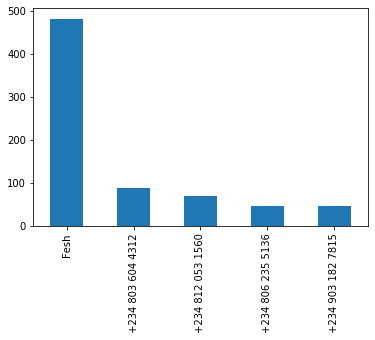

In [15]:
top5messengers = apfesh_df.number.value_counts(ascending=False).head()
print(top5messengers)
top5messengers.plot(kind="bar")

Fesh                 481
+234 803 604 4312     88
+234 812 053 1560     70
+234 806 235 5136     46
+234 903 182 7815     46
Name: number, dtype: int64


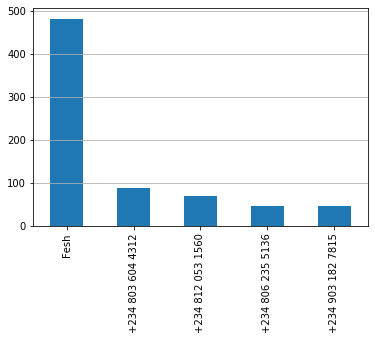

In [16]:
print(top5messengers)
fig, ax2 = plt.subplots()
top5messengers.plot(kind='bar',ax=ax2, fontsize=10, sort_columns=True)
ax2.grid(axis='y')
plt.show()

Fesh                 481
+234 803 604 4312     88
+234 812 053 1560     70
+234 806 235 5136     46
+234 903 182 7815     46
+234 705 579 9202     41
+234 816 398 2854     38
+234 701 291 2307     26
+234 903 895 4127     26
+234 815 457 9644     24
Name: number, dtype: int64


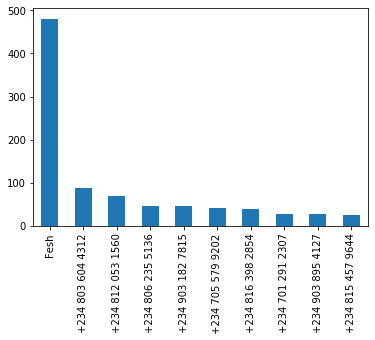

In [19]:
top10messengers = apfesh_df.number.value_counts(ascending=False).head(10)
print(top10messengers)
top5messengers.plot(kind="bar")

Fesh                 481
+234 803 604 4312     88
+234 812 053 1560     70
+234 806 235 5136     46
+234 903 182 7815     46
+234 705 579 9202     41
+234 816 398 2854     38
+234 701 291 2307     26
+234 903 895 4127     26
+234 815 457 9644     24
Name: number, dtype: int64


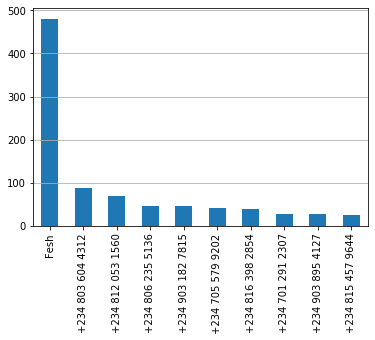

In [20]:
print(top10messengers)
fig, ax2 = plt.subplots()
top5messengers.plot(kind='bar',ax=ax2, fontsize=10, sort_columns=True)
ax2.grid(axis='y')
plt.show()